In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('minihomeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df.info()
df.describe().style.background_gradient(cmap='CMRmap')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [ ]:
df.isna().sum()

,0
area,0
bedrooms,1
age,0
price,0


In [ ]:
df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


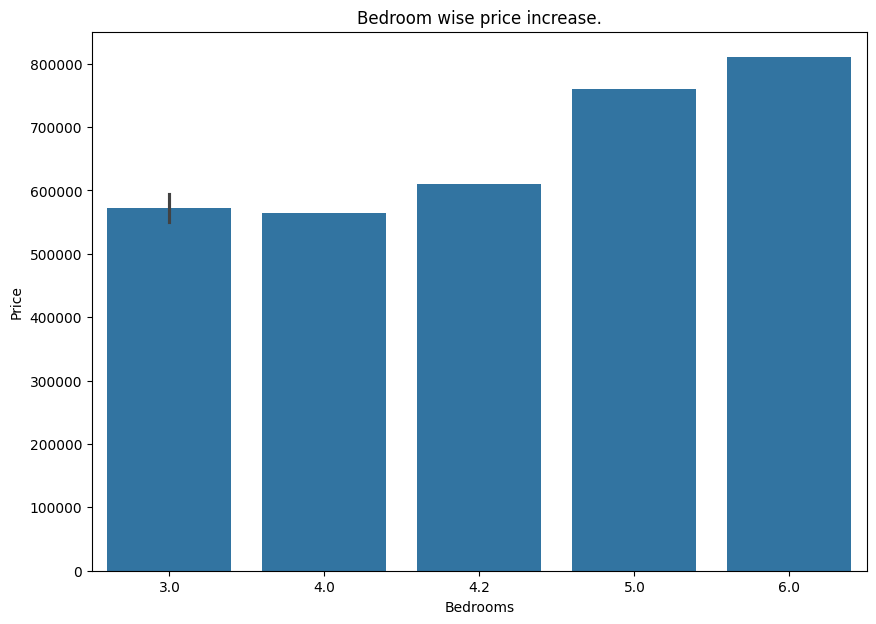

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")
sns.barplot(x='bedrooms', y='price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

<Figure size 1000x700 with 0 Axes>

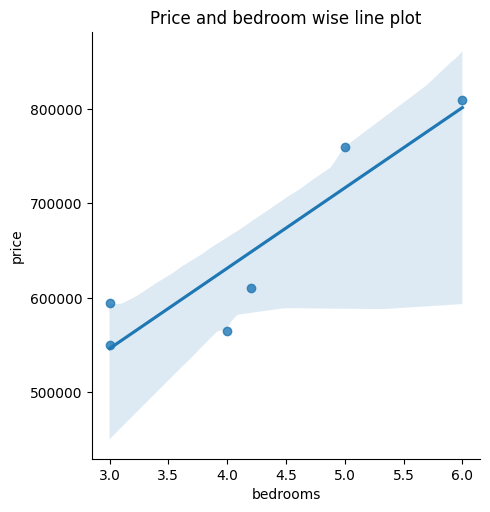

In [ ]:
plt.figure(figsize=(10, 7))
sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.drop(['price'], axis=1)
y = df['price']
df['bedrooms'] = df['bedrooms'].astype('int64')
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


[551989.04870256]
[  116.66950551 18756.28806982 -3675.75111708]
231586.00639409182
95.40926625396438


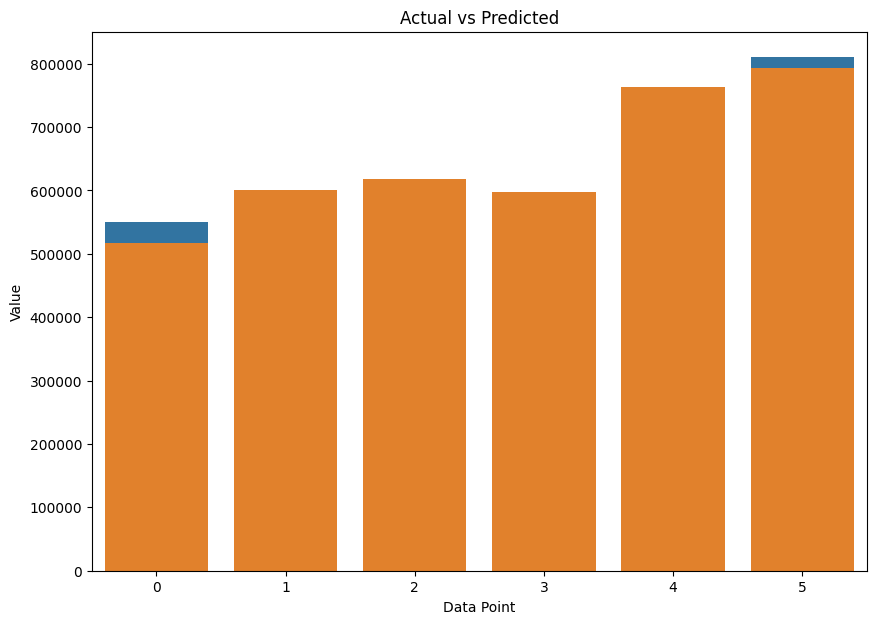

In [ ]:
model.fit( X, y)
print(model.predict([[4000, 2, 50 ]]))
print(model.coef_)
print(model.intercept_)
score = model.score( X, y )
print(score * 100)
y_pred = model.predict(X)
df_preds = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df_preds.head()
plt.figure(figsize=(10,7))
sns.barplot(x = df_preds.index, y='Actual', data=df_preds)
sns.barplot(x = df_preds.index, y='Predicted', data=df_preds)
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.show()